In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
print(os.listdir())

['rail_coms', '.ipynb_checkpoints', 'filename', 'lstmcom.ipynb', 'Latest_con_mat.jpeg', 'final_cleaned', 'd']


In [3]:
df=pd.read_csv("final_cleaned")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Text,Time,Complaint,Sub-Complaint,clean_text,clean_list,complaint_id
0,1,1,1,Sr. Citizen discount fare in tatkal sewa from ...,2013-08-27 16:00:28,Reservation/Enquiry_Office Issues,Any Other Issues (Enquiry),sr citizen discount fare tatkal sewa jammu delhi,"['sr', 'citizen', 'discount', 'fare', 'tatkal'...",11
1,2,2,2,RATS ARE PRESENT IN COACH B1 OF TRAIN NUMBER 1...,2013-08-14 21:12:49,Maintenance / Cleanliness,Cockroaches,rat present coach train number ranakpur expres...,"['rat', 'present', 'coach', 'train', 'number',...",7
2,3,3,3,12003 coach e1 toilet no 3 leaking vinay pnr 2...,2013-08-27 18:31:57,Maintenance / Cleanliness,A/C & Electrical fittings- Loose,coach toilet leak vinay pnr,"['coach', 'toilet', 'leak', 'vinay', 'pnr']",7
3,7,7,7,Train no . 12321 pnr no 6122312493 complain _ ...,2013-08-27 20:22:41,Catering and Vending Services,Overcharging (Catering),train pnr complain pentry car meal prize rs.mi...,"['train', 'pnr', 'complain', 'pentry', 'car', ...",3
4,8,8,8,Train no . 12321 pnr no 6122312493 complain _ ...,2013-08-27 20:22:41,Catering and Vending Services,Overcharging (Catering),train pnr complain pentry car meal prize rs.mi...,"['train', 'pnr', 'complain', 'pentry', 'car', ...",3


In [5]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import itertools, string, operator, re, unicodedata, nltk
from operator import itemgetter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk.tokenize
import numpy as np
from itertools import combinations
from gensim.models import Phrases
from collections import Counter


In [8]:
import nltk

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anubhav/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

ModuleNotFoundError: No module named 'plotly'

In [11]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean_text'].astype('str').values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 92699 unique tokens.


In [12]:
X = tokenizer.texts_to_sequences(df['clean_text'].astype('str').values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (219820, 250)


In [13]:
Y = pd.get_dummies(df['Complaint']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (219820, 14)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(197838, 250) (197838, 14)
(21982, 250) (21982, 14)


In [15]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 14)                1414      
Total params: 5,081,814
Trainable params: 5,081,814
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 178054 samples, validate on 19784 samples
Epoch 1/5
178054/178054 [==============================] - 1251s 7ms/step - loss: 0.6228 - acc: 0.8128 - val_loss: 0.4065 - val_acc: 0.8820
Epoch 2/5
178054/178054 [==============================] - 1193s 7ms/step - loss: 0.3691 - acc: 0.8907 - val_loss: 0.3712 - val_acc: 0.8916
Epoch 3/5
178054/178054 [==============================] - 1428s 8ms/step - loss: 0.3081 - acc: 0.9071 - val_loss: 0.3734 - val_acc: 0.8931
Epoch 4/5
178054/178054 [==============================] - 1238s 7ms/step - loss: 0.2692 - acc: 0.9180 - val_loss: 0.3740 - val_acc: 0.8929
Epoch 5/5
178054/178054 [==============================] - 1180s 7ms/step - loss: 0.2386 - acc: 0.9272 - val_loss: 0.3928 - val_acc: 0.8908


In [22]:
filename='final_model.sav'
pickle.dump(model,open(filename,'wb'))

In [25]:
print(os.path.getsize('final_model.sav'))

60991133


In [26]:
import pickle
filname='final_model.sav'
with open(filname, 'rb') as training_model:  
     fil= pickle.load(training_model)

In [27]:
model=fil.model

/home/anubhav/.local/lib/python3.6/site-packages/keras/engine/sequential.py:110: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


In [28]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

21982/21982 [==============================] - 34s 2ms/step
Test set
  Loss: 0.395
  Accuracy: 0.888


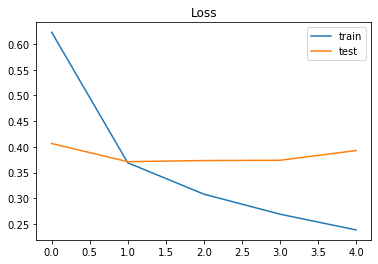

In [71]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig('Loss_curve.jpeg')
plt.show()

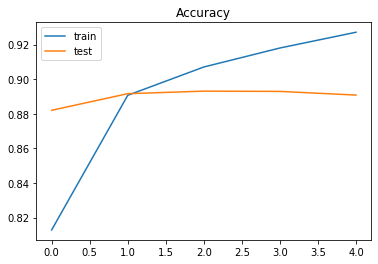

In [72]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.savefig('Accuracy_curve.jpeg')
plt.show();


In [41]:
un_arr=np.unique(df.Complaint.values)
un_arr

(14,)

In [89]:
new_complaint=["Luggage is not here"]
print(new_complaint)
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
print(padded.shape)
pred = model.predict(padded)
print(pred.shape)
print(pred,'\n Complaint Type:',un_arr[np.argmax(pred)])

['Luggage is not here']
(1, 250)
(1, 14)
[[0.03346786 0.34847006 0.01115322 0.02766619 0.00967608 0.00434387
  0.02299897 0.01313702 0.03026727 0.21421339 0.10143992 0.05360984
  0.04101245 0.08854396]] 
 Complaint Type: Booking of Luggage / Parcels / Goods


In [96]:
def output(new_complaint,name):
    seq = tokenizer.texts_to_sequences(new_complaint)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    #print(padded.shape)
    pred = model.predict(padded)
    #print(pred.shape)
    print('Hello',''.join(name))
    print('\nYour Complaint is successfully registered under \nComplaint Type:',un_arr[np.argmax(pred)],' and will responded within 2 hours.')
    print('\nInconvenience is deeply regretted')
    print('Thank You')

In [97]:
print('Hi! Welcome To Indian Railways:')
print('\nPlease provide us the following details:')
name=str(input('\nName:'))
mob=str(input('\nMobile Number:'))
email=str(input('\nEmail-id:'))
str_complaint=str(input('\nComplaint:'))
new_complaint=[0]*1
new_complaint[0]=str_complaint
#print(new_complaint)
output(new_complaint,name)

Hi! Welcome To Indian Railways:

Please provide us the following details:

Name:Anubhav Singh

Mobile Number:7357350814

Email-id:anubhav.singh2359@gmail.com

Complaint:I am travelling in Duronto Express to pune. The bedroll provided is too dirty and no action was taken.Please help me asap.
Hello Anubhav Singh

Your Complaint is successfully registered under 
Complaint Type: Bedroll Complaints  and will responded within 2 hours.

Inconvenience is deeply regretted
Thank You


In [98]:
def Complaint():
    print('Hi! Welcome To Indian Railways:')
    print('\nPlease provide us the following details:')
    name=str(input('\nName:'))
    mob=str(input('\nMobile Number:'))
    email=str(input('\nEmail-id:'))
    str_complaint=str(input('\nComplaint:'))
    new_complaint=[0]*1
    new_complaint[0]=str_complaint
    #print(new_complaint)
    output(new_complaint,name)

In [99]:
Complaint()

Hi! Welcome To Indian Railways:

Please provide us the following details:

Name:Anubhav Singh

Mobile Number:7357350815

Email-id:anubhav.singh2359@gmail.com

Complaint:I am travelling in Duronto Express to pune. The bedroll provided is too dirty and no action was taken.Please help me asap.
Hello Anubhav Singh

Your Complaint is successfully registered under 
Complaint Type: Bedroll Complaints  and will responded within 2 hours.

Inconvenience is deeply regretted
Thank You


In [ ]:
Complaint()


Hi! Welcome To Indian Railways:

Please provide us the following details:

Name:Anmol Saxena

Mobile Number:7906300243

Email-id:anmsaxena123@yahoo.com


In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [74]:
y_pred=model.predict(X_test)

KeyboardInterrupt: 

In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
Y_test=np.argmax(Y_test,axis=1)

In [ ]:
print(Y_test.shape,y_pred.shape)

In [61]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_test,y_pred)


In [62]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (40,30), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('Latest_con_mat.jpeg')
    return fig

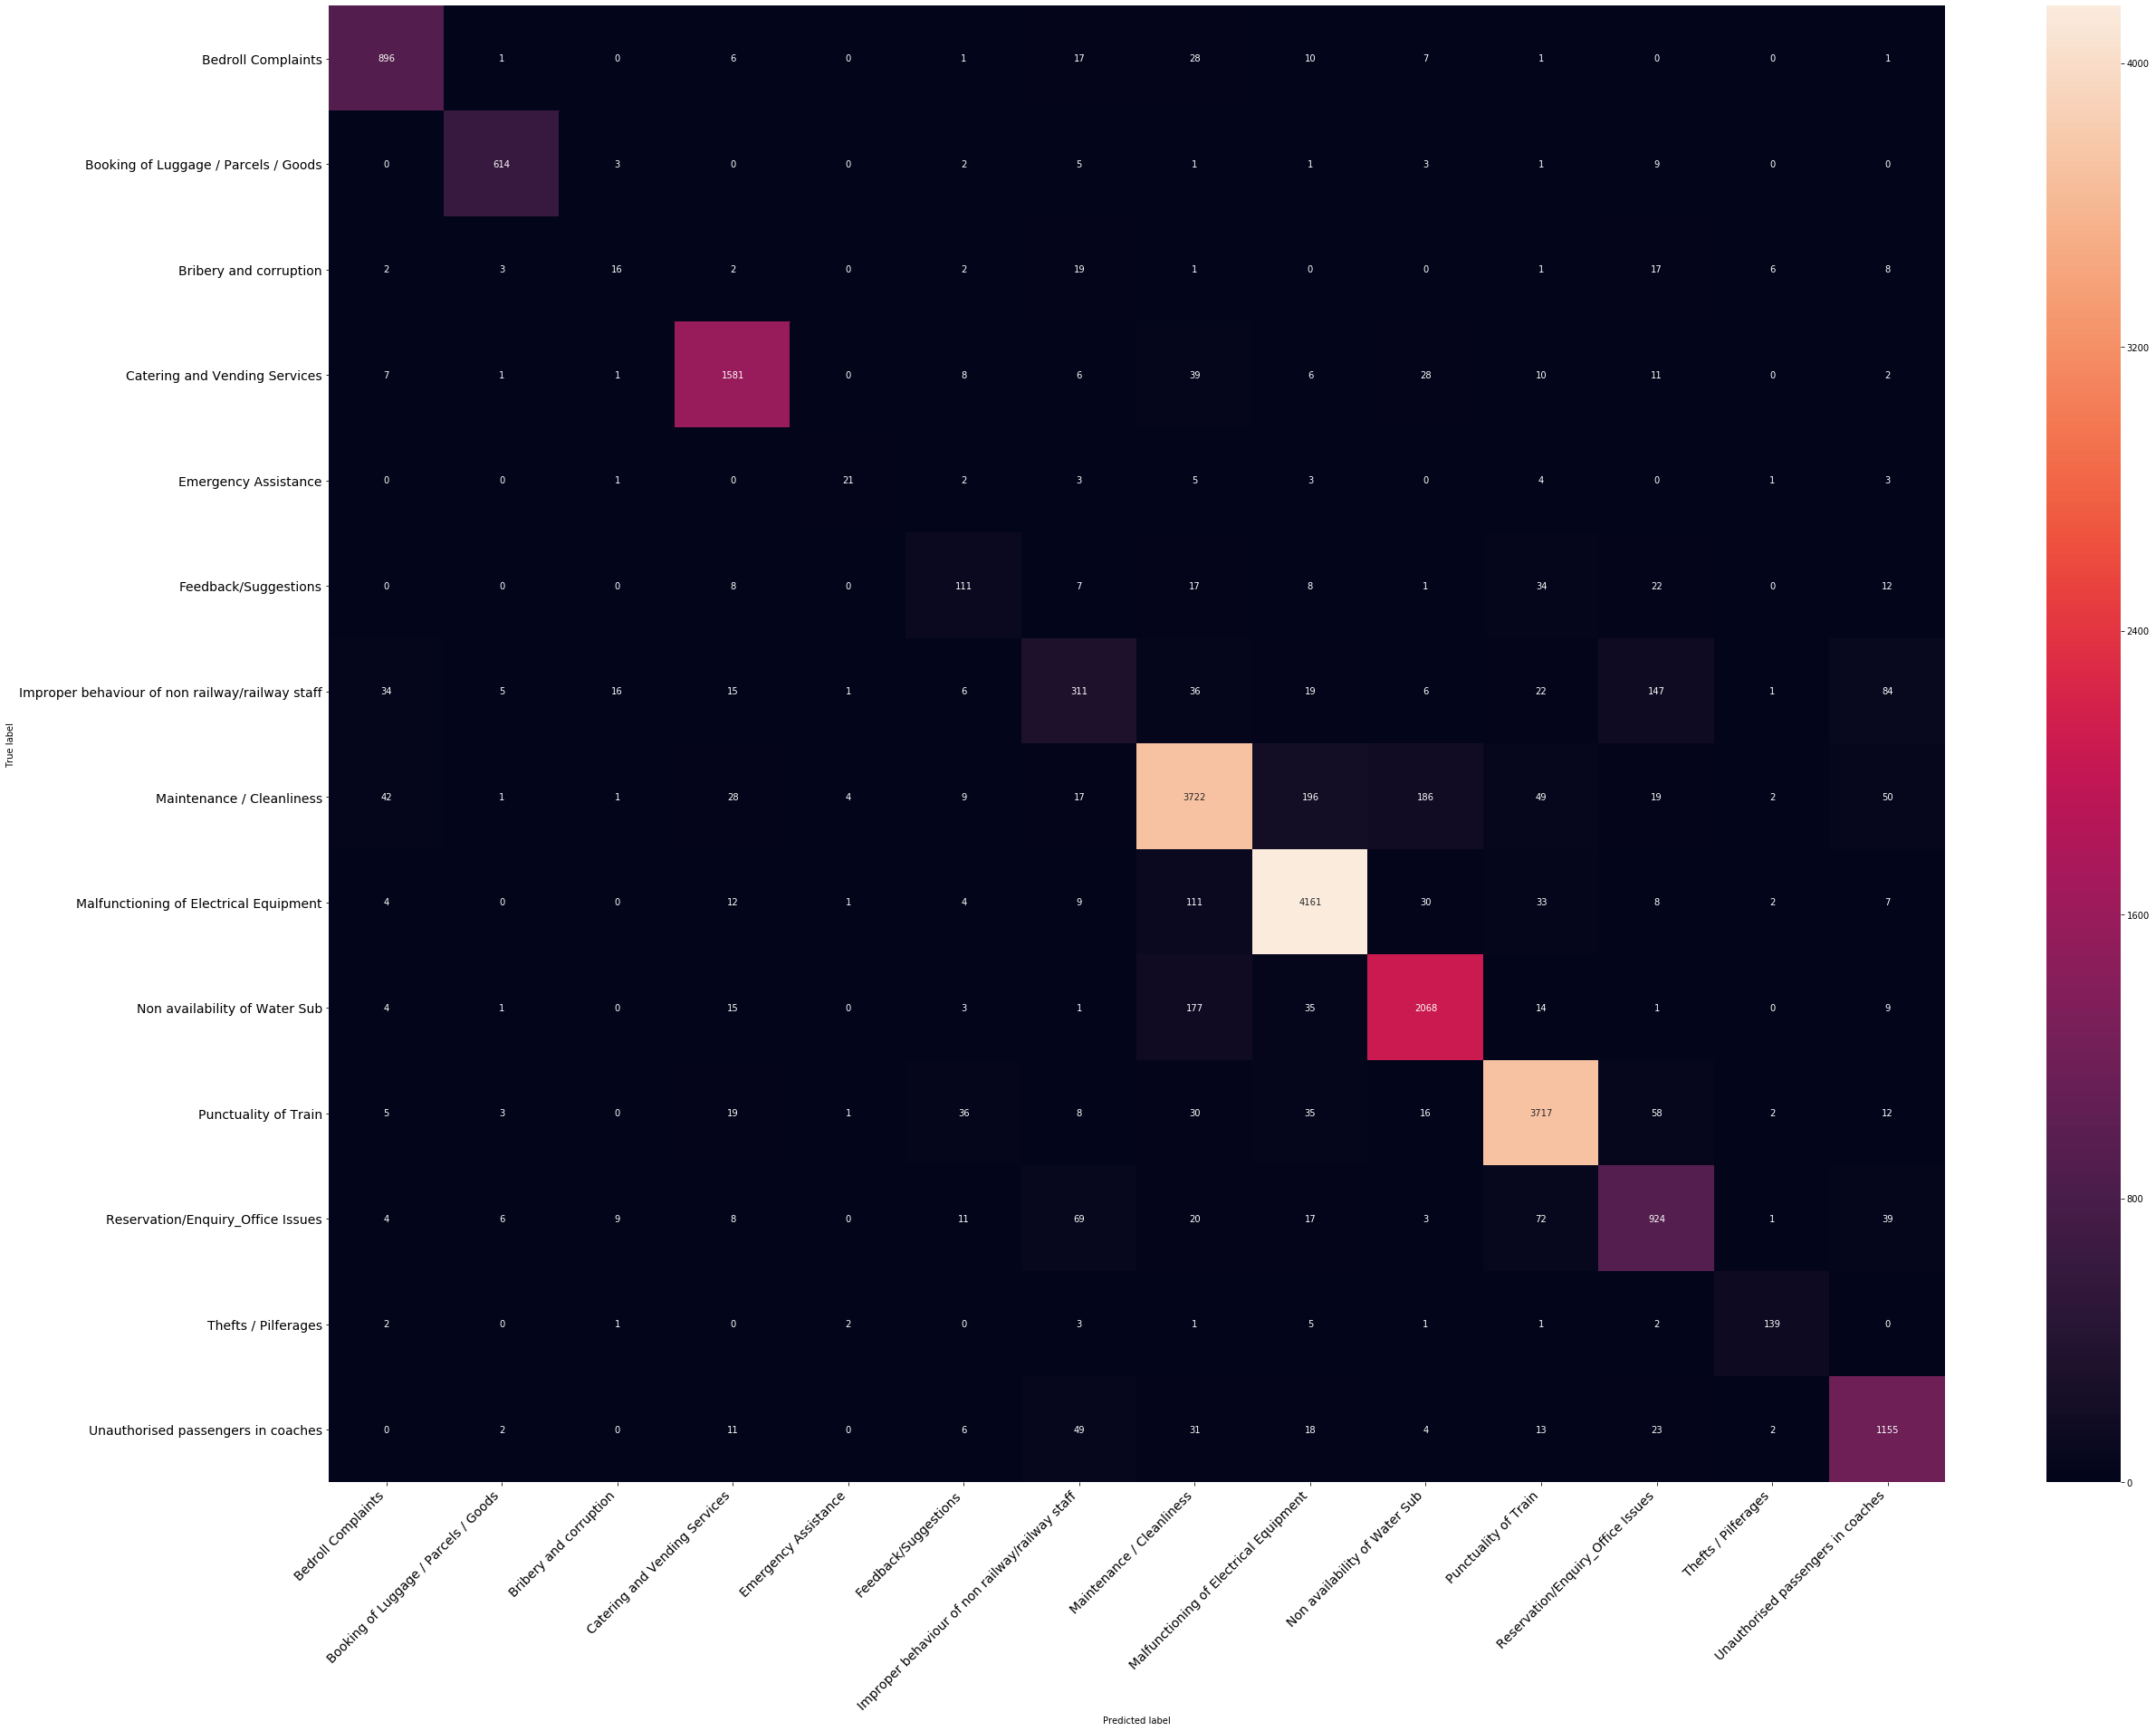

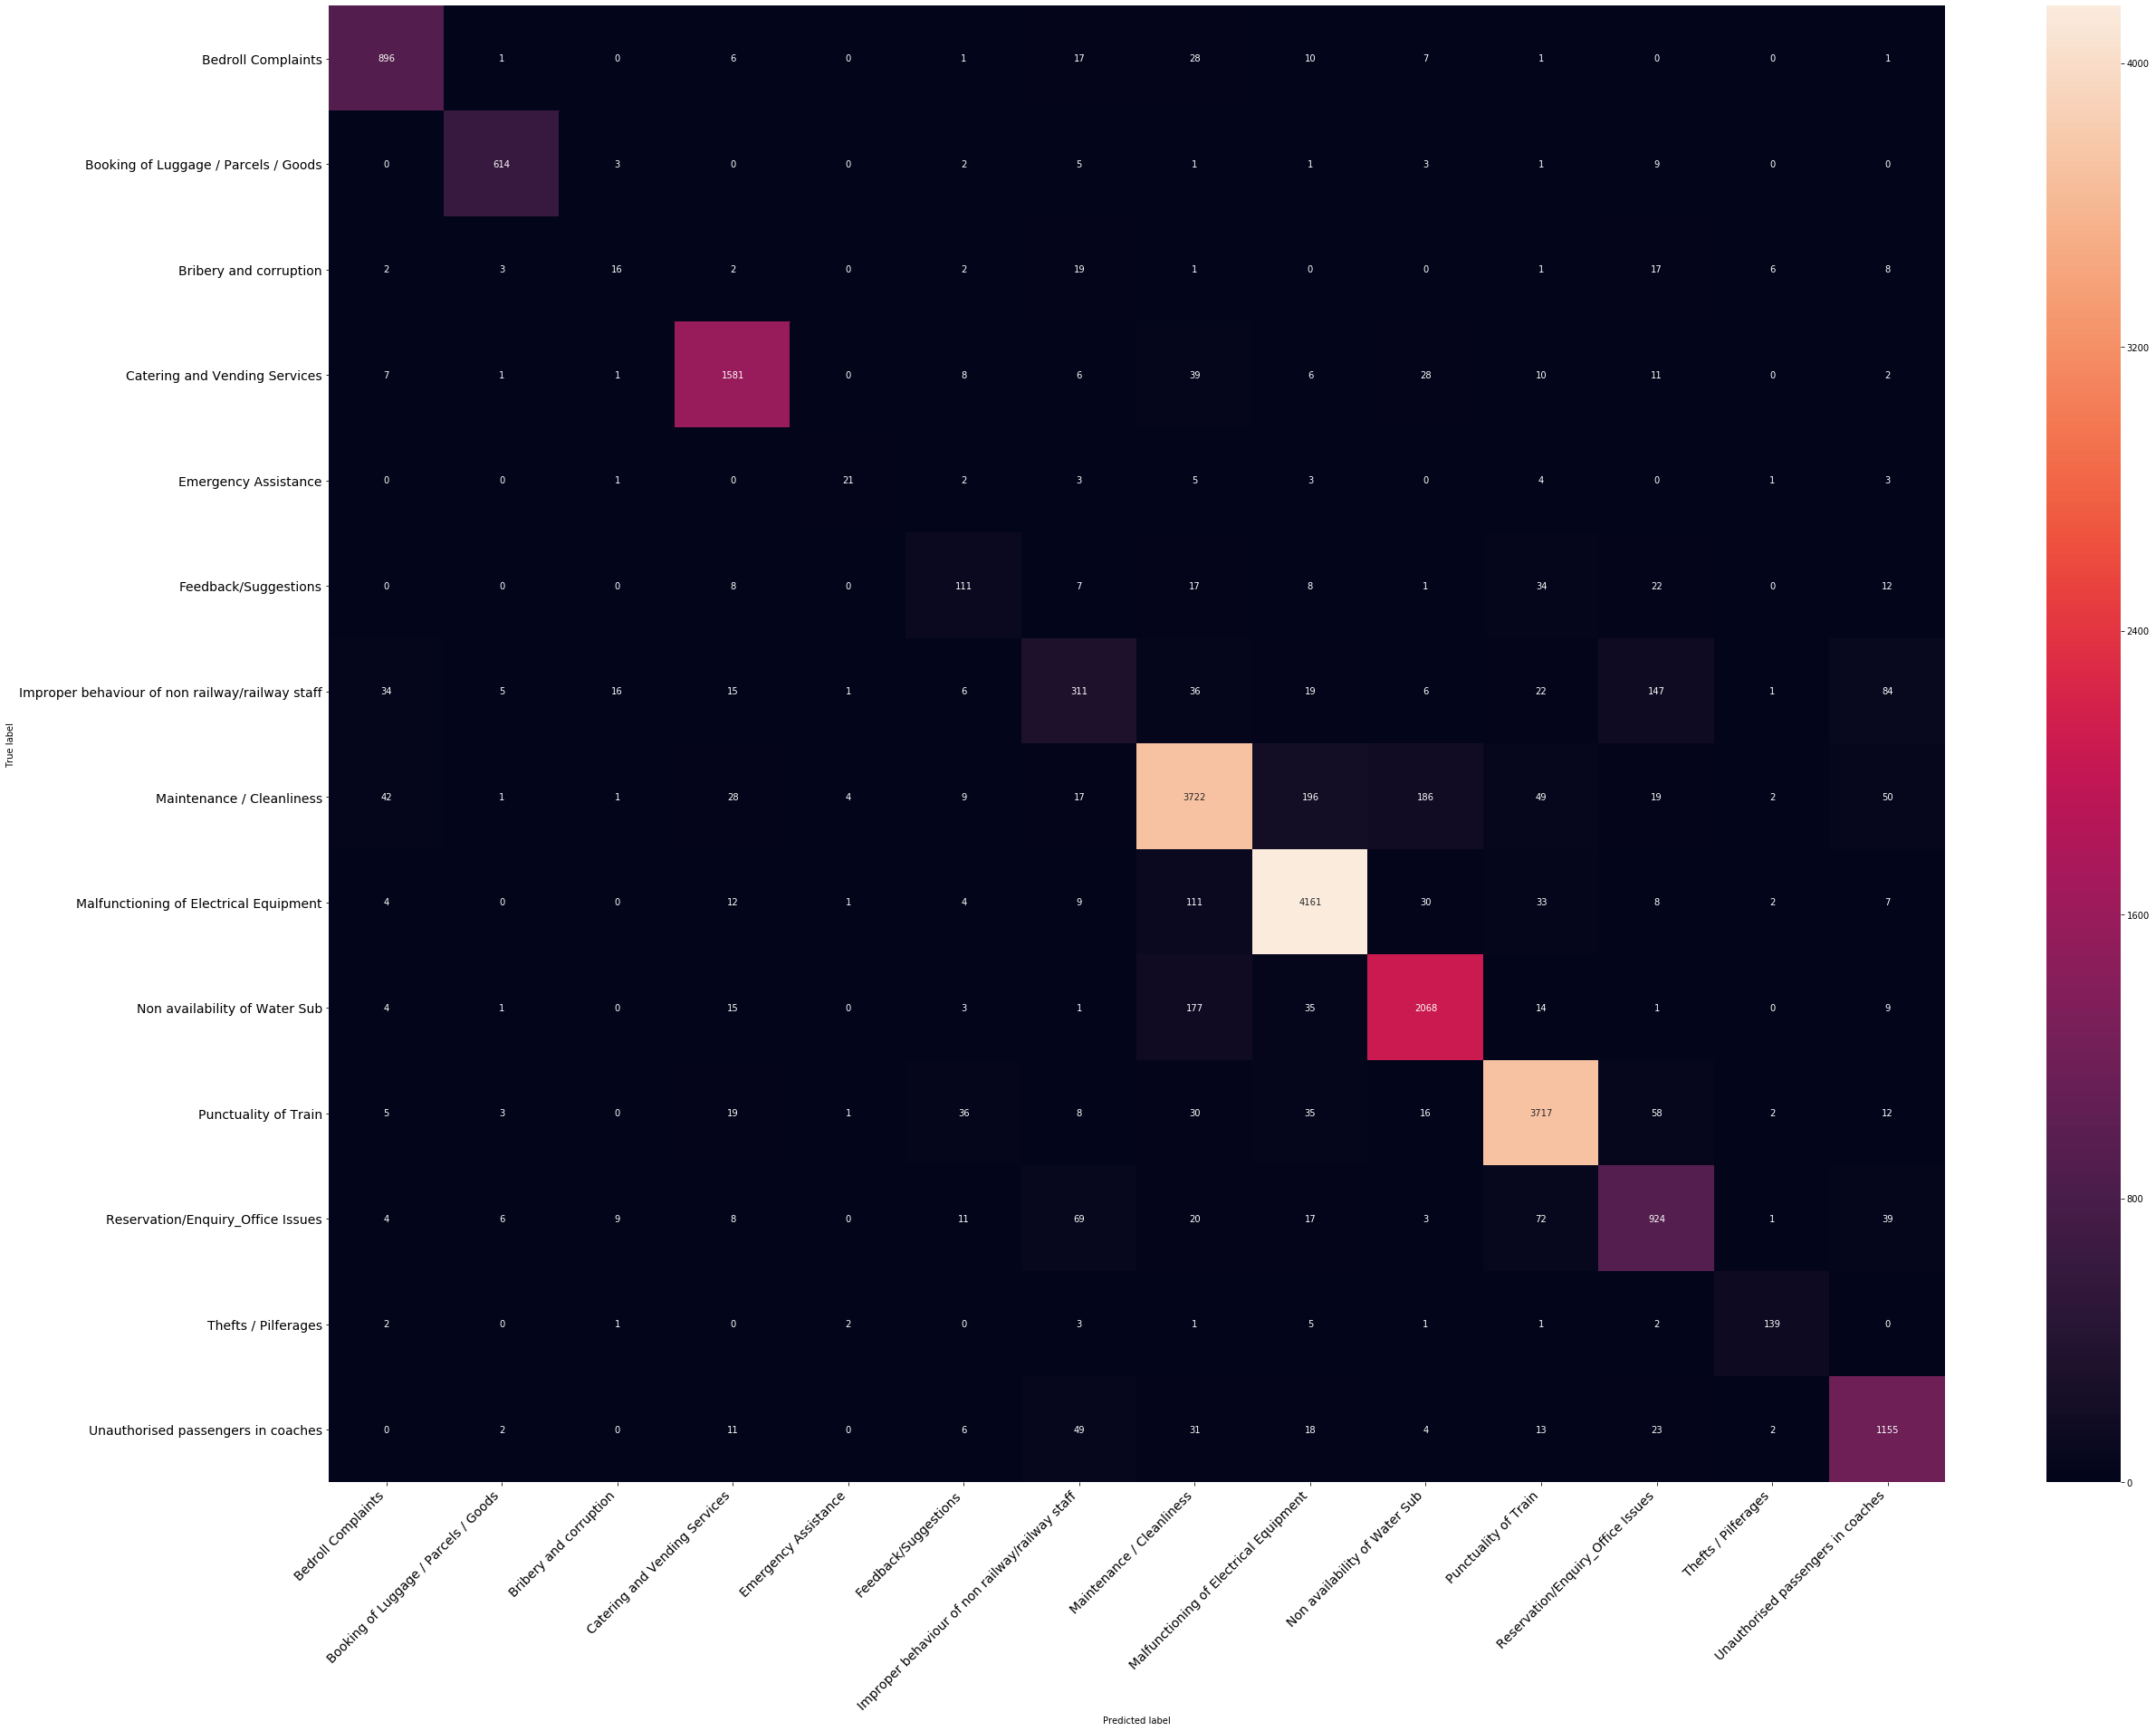

In [63]:
un_arr=np.unique(df.Complaint.values)
print_confusion_matrix(conf_mat,un_arr)


In [64]:
print(classification_report(Y_test, y_pred,target_names=un_arr)) 

                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.90      0.93      0.91       968
           Booking of Luggage / Parcels / Goods       0.96      0.96      0.96       639
                         Bribery and corruption       0.33      0.21      0.26        77
                  Catering and Vending Services       0.93      0.93      0.93      1700
                           Emergency Assistance       0.70      0.49      0.58        43
                           Feedback/Suggestions       0.55      0.50      0.53       220
Improper behaviour of non railway/railway staff       0.59      0.44      0.51       703
                      Maintenance / Cleanliness       0.88      0.86      0.87      4326
         Malfunctioning of Electrical Equipment       0.92      0.95      0.94      4382
                  Non availability of Water Sub       0.88      0.89      0.88      2328
                    